In [40]:
import matplotlib
import PIL
matplotlib.use('Agg')  # this specifies a "back-end" for matplotlib so that it doesn't attempt to display the figure when you save it
from matplotlib import pyplot as plt
import numpy as np
def make_scalebar(num_ticks_top, step_ticks_top, 
                  num_ticks_bottom, step_ticks_bottom,
                  outfile='scalebar.png',
                  scale_top=1.0, 
                  scale_bottom=3.28084,
                  # scale_bottom=0.3048,
                  units_top='feet', units_bottom='meters', dpi=200):
    """Generates a dual scale bar and writes it to disk as a png that 
    is ten inches wide and one inch tall at 200 pixels per inch 
    (output image is 2000 pixels wide x 200 pixels tall).
    Parameters
    ----------
    num_ticks_top, num_ticks_bottom : int
      number of ticks, including starting and ending points, to use for drawing scale bars
    step_ticks_top, step_ticks_bottom : numeric
      amount that each successive tick adds to previous tick
    outfile : str
      path to output file that will be generated
    scale_top, scale_bottom : numeric
      relative scales of units in top and bottom scale bars
    units_top, units_bottom : str    
      string used to label units on the last tick in the scale bar
    dpi : int
    """
    width_top = (num_ticks_top-1) * scale_top * step_ticks_top/step_ticks_bottom
    width_bot = (num_ticks_bottom-1) * scale_bottom
    min_top, max_top = -width_top / 2, width_top / 2
    min_bot, max_bot = -width_bot / 2, width_bot / 2
    fig = plt.figure(frameon=False)
    # TODO: need to calculate width based on pixels and DPI
    fig.set_size_inches(10,1)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    ax.plot((min_top,max_top), (1.0, 1.0), lw=0.5, color='black')
    ticks = np.linspace(min_top, max_top, num_ticks_top)
    for i, x in enumerate(ticks):
        ax.plot((x, x), (1.0, 3.0), lw=0.5, color='black')
        ax.text(x, 4.0, '{:,d}'.format(step_ticks_top*i),
                horizontalalignment='center',
                verticalalignment='bottom', 
                fontname='arial')
        if x == ticks[-1]:
            spaces = ' ' * len('{:,d}'.format(step_ticks_top*i))
            ax.text(x, 4.0, spaces + units_top,
                    horizontalalignment='left',
                    verticalalignment='bottom', 
                    fontname='arial')
    ax.plot((min_bot,max_bot), (-1,-1), lw=0.5, color='black')
    ticks = np.linspace(min_bot, max_bot, num_ticks_bottom)
    for i, x in enumerate(ticks):
        ax.plot((x, x), (-1.0, -3.0), lw=0.5, color='black')
        ax.text(x, -4.0, '{:,d}'.format(step_ticks_bottom*i),
                horizontalalignment='center',
                verticalalignment='top', 
                fontname='arial')
        if x == ticks[-1]:
            spaces = ' ' * len('{:,d}'.format(step_ticks_bottom*i))
            ax.text(x, -4.0, spaces + units_bottom,
                    horizontalalignment='left',
                    verticalalignment='top', 
                    fontname='arial')
    ax.set_ylim(-10,10)
    ax.axis('off')
    #TODO: need to convert to PIL.Image, not a file.
    # plt.savefig(outfile, dpi=dpi)
    return plt_to_pil_image(plt, dpi)

def plt_to_pil_image(plt_plot, dpi=200):
    import io
    from PIL import Image
    # import matplotlib.pyplot as plt

    buf = io.BytesIO()
    plt_plot.savefig(buf, format='png', dpi=dpi)
    buf.seek(0)
    pil_image = Image.open(buf)
#     buf.close()
    return pil_image

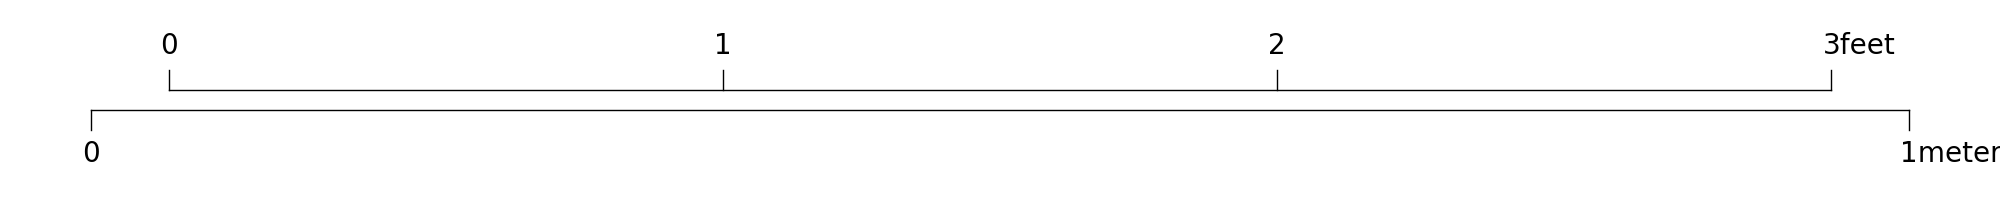

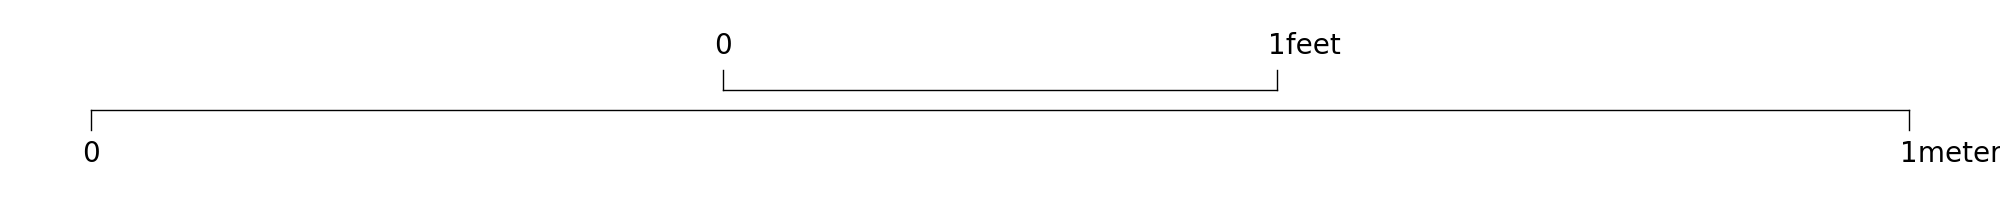

In [41]:
foo = make_scalebar(4,1,2,1)
display(foo)
foo = make_scalebar(2,1,2,1)
display(foo)

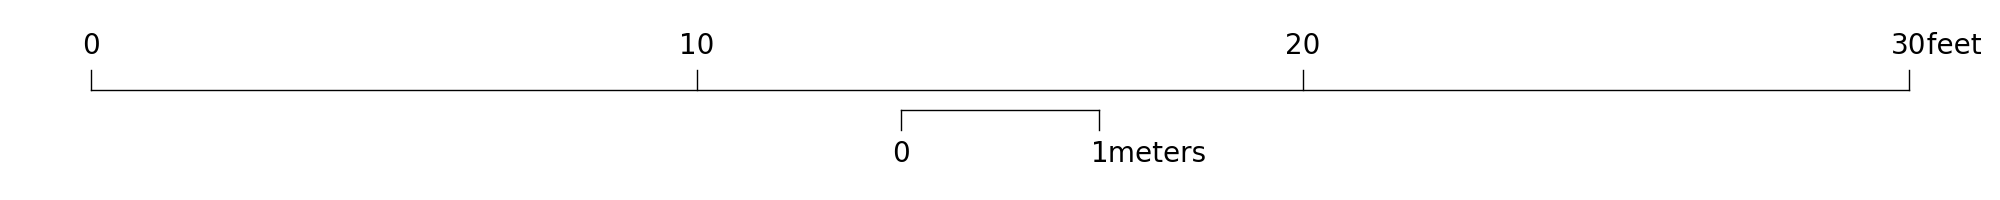

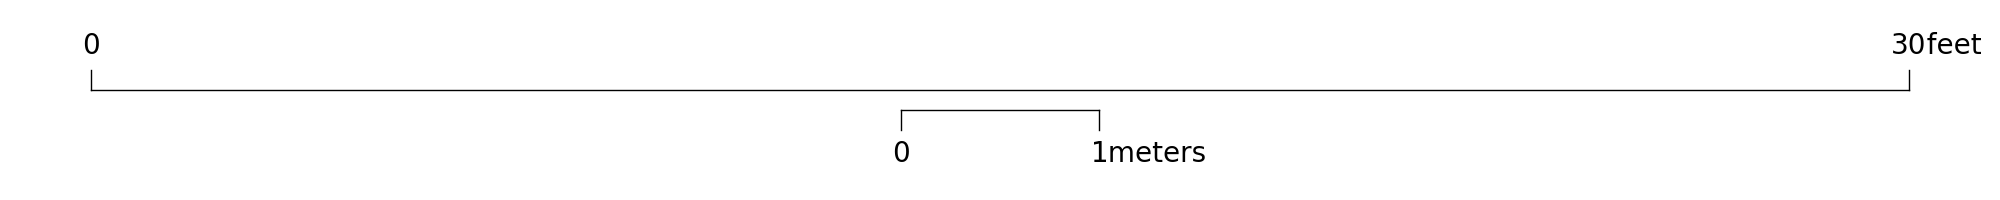

In [42]:
foo = make_scalebar(4,10,2,1)
display(foo)
foo = make_scalebar(2,30,2,1)
display(foo)